In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
#from __future__ import print_function

## Bayesian A/B Testing

This is just an illustartion of how this method can effectively deal with mid-size datasets to draw trustworthy conclusions about the relative merits of treatment A and treatment B.

I'm just going to reproduce the results of one of the clinical trials listed in the IBA clinical Reference list that Bob passed on, show how this method very easy gives the same results.
Then I am going to do the same kind of analysis for the 2015 major league baseball season, where treatment A is the american league, treatment b is the national league, and we are measuring which league is **better** at hitting home runs.
I'm just doing this so you can get calibrate the meaning of the results of the clinical study, which essentially yields the same numbers as the baseball result.

The baseball exmaple we already know before hand that the american league is much much better at hitting home runs because the pitcher does not bat. So the difference between proton and photon therapy in this one study is on par with that between american league and national league home run production, which is **huge**.

I wont get down in the weeds right now; I just want to illustrate that we can start doing this kind of analysis right away by looking at the published literature. The analysis of each study that publishes the relevant counts takes no time at all.

I'll first do the baseball example, which I'm guessing will make some intuitive sense to Bob.

The data is found here: http://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=0&type=8&season=2015&month=0&season1=2015&ind=0&team=0,ts&players=0

You would expect the American League to be demonstrably different because of the designated hitter.

AL : 2634 HR in 91837 PA


NL : 2275 HR in 91790 PA

In [2]:
from scipy.stats import beta

In [3]:
AL_PA = 91837
NL_PA = 91790

AL_HR = 2634
NL_HR = 2275

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_AL = beta(alpha_prior + AL_HR, beta_prior + AL_PA - AL_HR)

posterior_NL = beta(alpha_prior + NL_HR, beta_prior + NL_PA - NL_HR)


samples = 200000

samples_posterior_AL = posterior_AL.rvs(samples)

samples_posterior_NL = posterior_NL.rvs(samples)

print (samples_posterior_AL > samples_posterior_NL).mean()

1.0


This means that we are **certain** tha the AL is "better" at hitting home runs then the NL.

(0.02, 0.04)

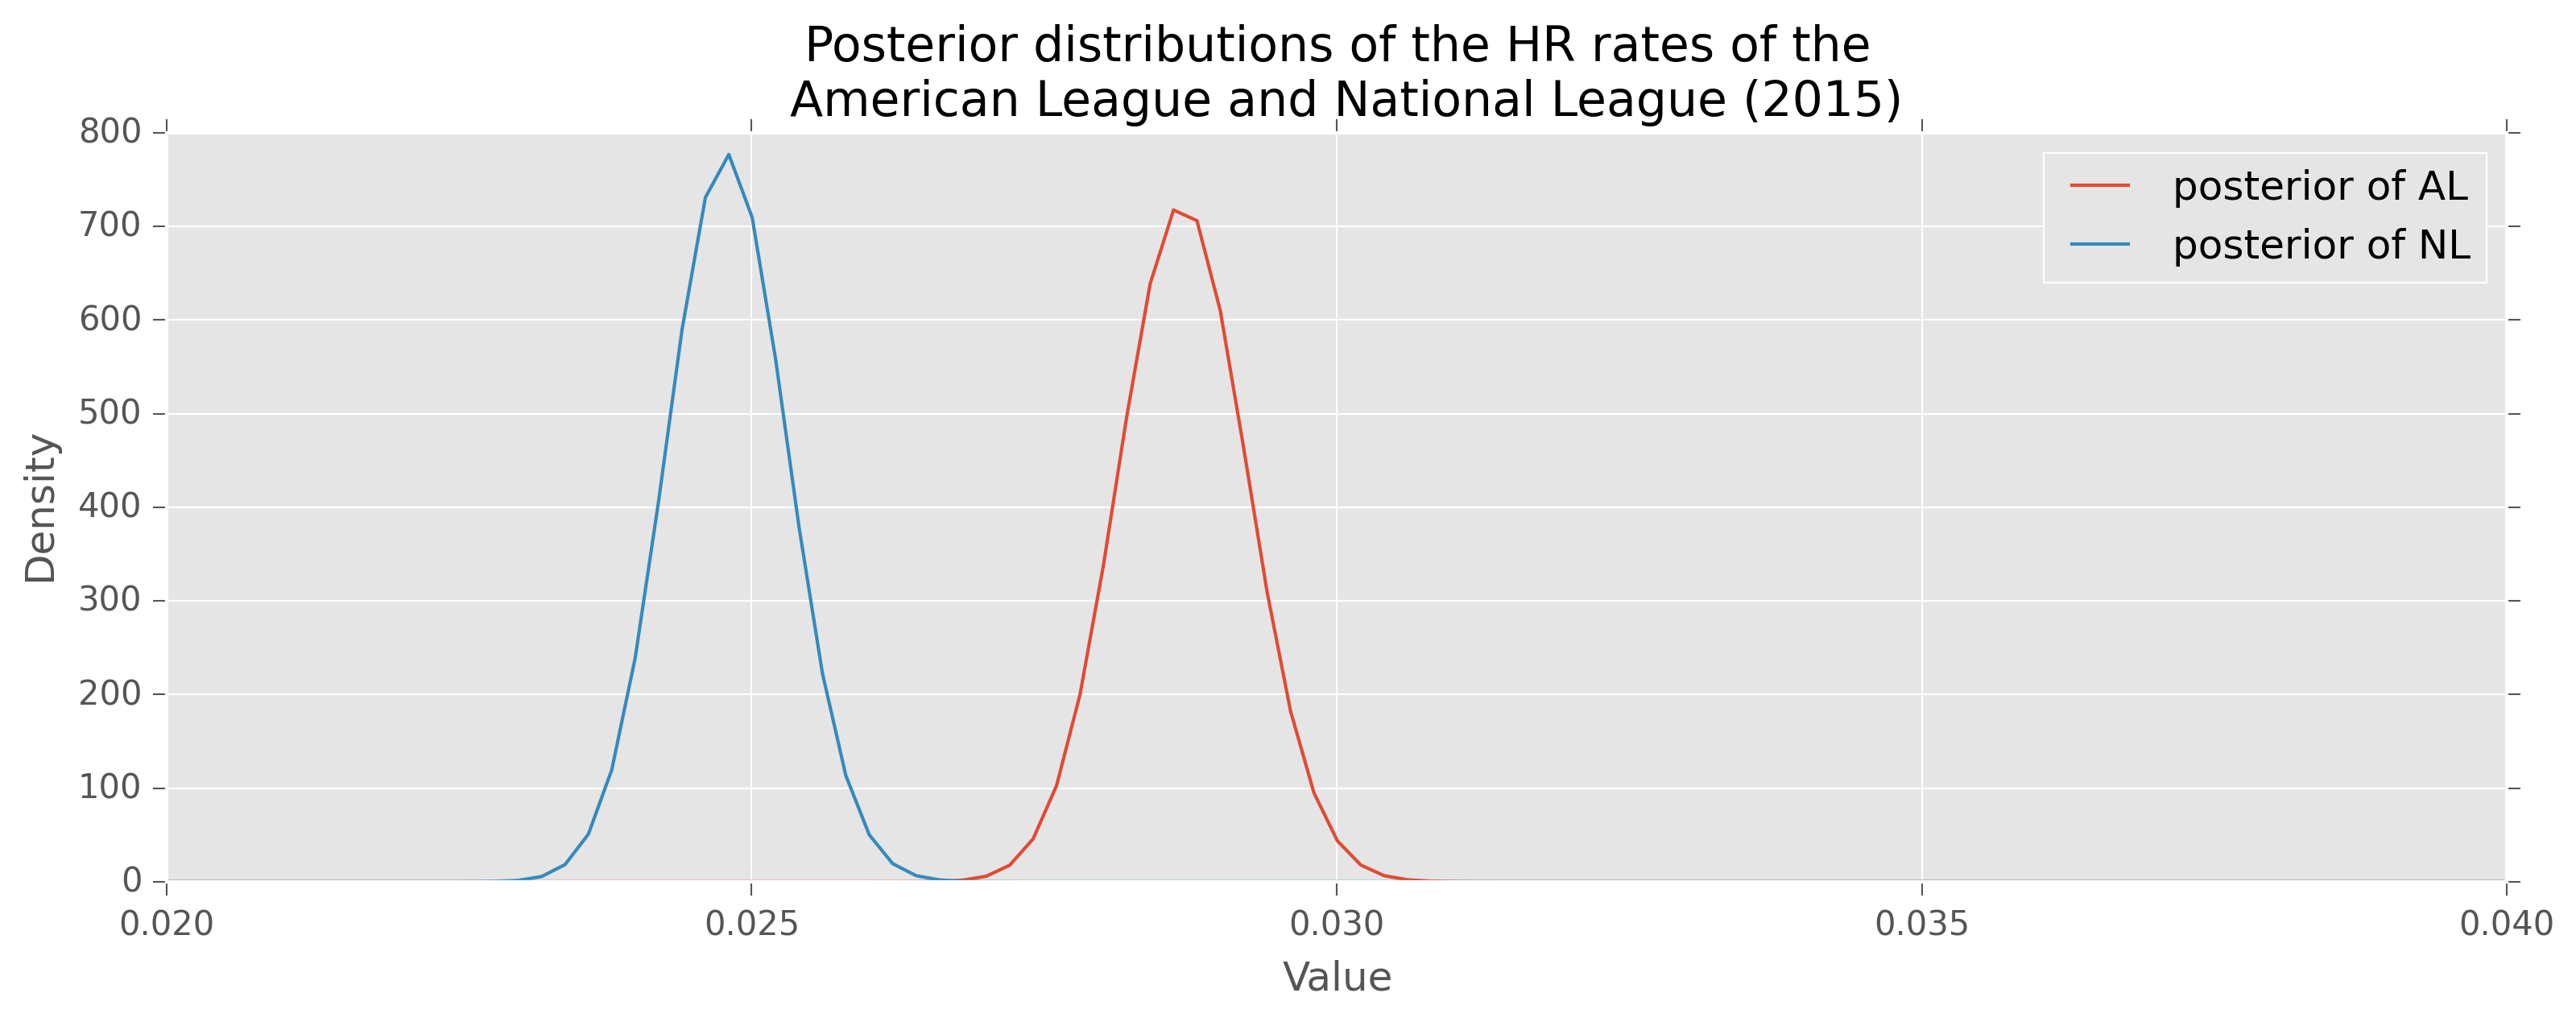

In [4]:
%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 5000)
plt.plot(x, posterior_AL.pdf(x), label='posterior of AL')
plt.plot(x, posterior_NL.pdf(x), label='posterior of NL')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distributions of the HR rates of the \n American League and National League (2015)")
plt.legend()
plt.xlim(0.02,0.04)

This plot just shows that the probablity of an AL batter hitting a home run at any time is around 2.8%, and a NL batter's is around 2.5%   . Just like if you roll a dice a dozen times, you are not likely to roll a 1 two times, having little data means what we observe is not necessarily the true probability. This method takes the observed data and finds ranges for the "true probability".

(array([  3.19014715e-03,   2.12676477e-03,   5.31691192e-03,
          1.16972062e-02,   1.48873534e-02,   4.14719130e-02,
          6.59297078e-02,   1.21225592e-01,   1.97789123e-01,
          2.57338537e-01,   3.86007805e-01,   5.71036340e-01,
          8.45388995e-01,   1.16653048e+00,   1.63973564e+00,
          2.10549712e+00,   2.95513965e+00,   3.81435261e+00,
          4.66080499e+00,   5.55617296e+00,   6.63125255e+00,
          7.88285361e+00,   8.97601071e+00,   1.00308860e+01,
          1.07624931e+01,   1.12580293e+01,   1.19258334e+01,
          1.21736015e+01,   1.23586301e+01,   1.18460798e+01,
          1.15206848e+01,   1.08071552e+01,   9.93199147e+00,
          8.94729938e+00,   7.84350847e+00,   6.87476711e+00,
          5.81563826e+00,   4.93834779e+00,   4.12486027e+00,
          3.37836583e+00,   2.53829375e+00,   2.06083506e+00,
          1.57805946e+00,   1.14207268e+00,   9.15572233e-01,
          5.80606782e-01,   4.31733248e-01,   3.39218981e-01,
        

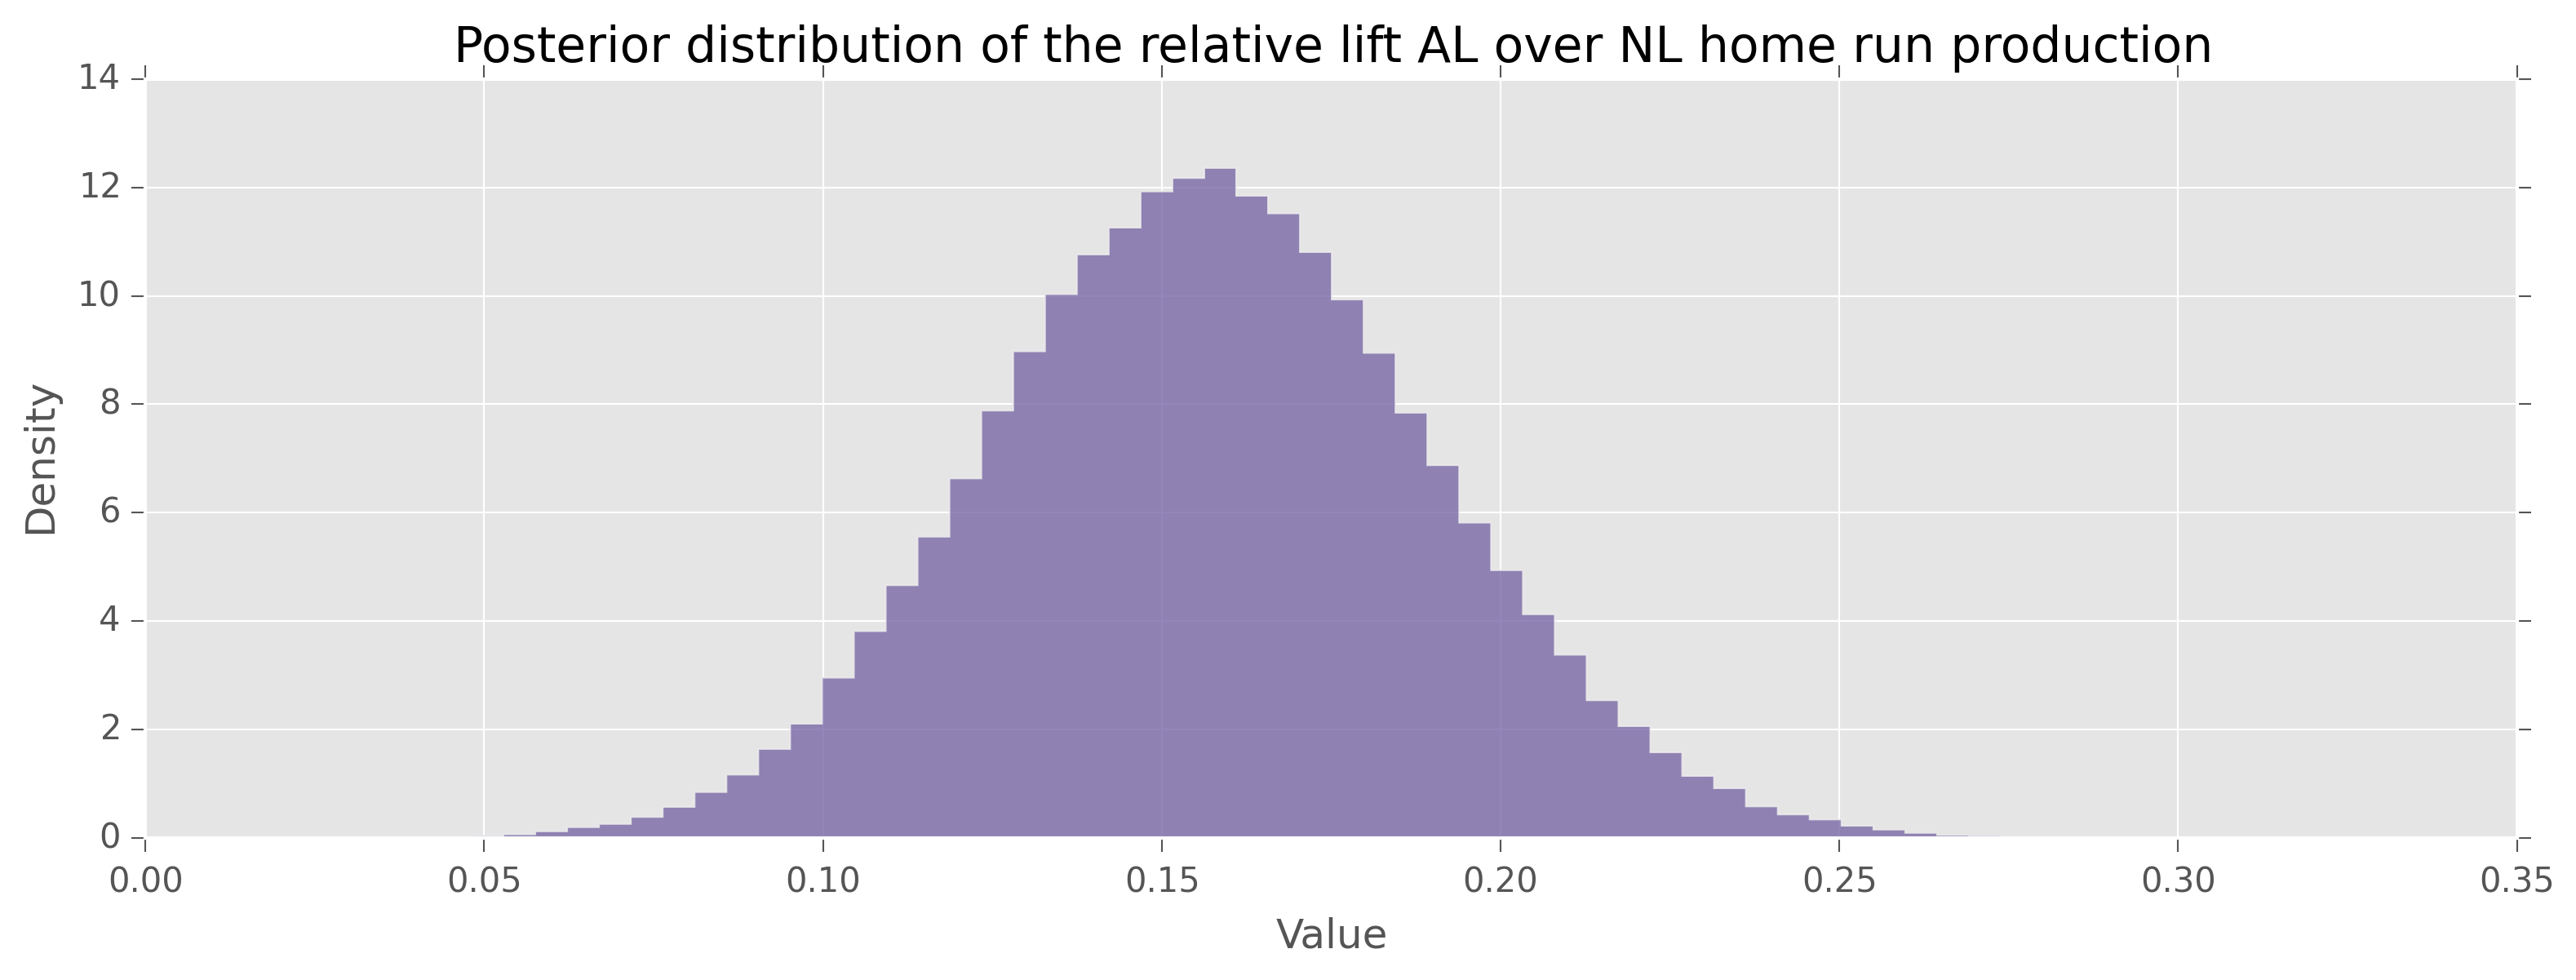

In [5]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_AL,
     samples_posterior_NL)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Posterior distribution of the relative lift AL over NL home run production")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

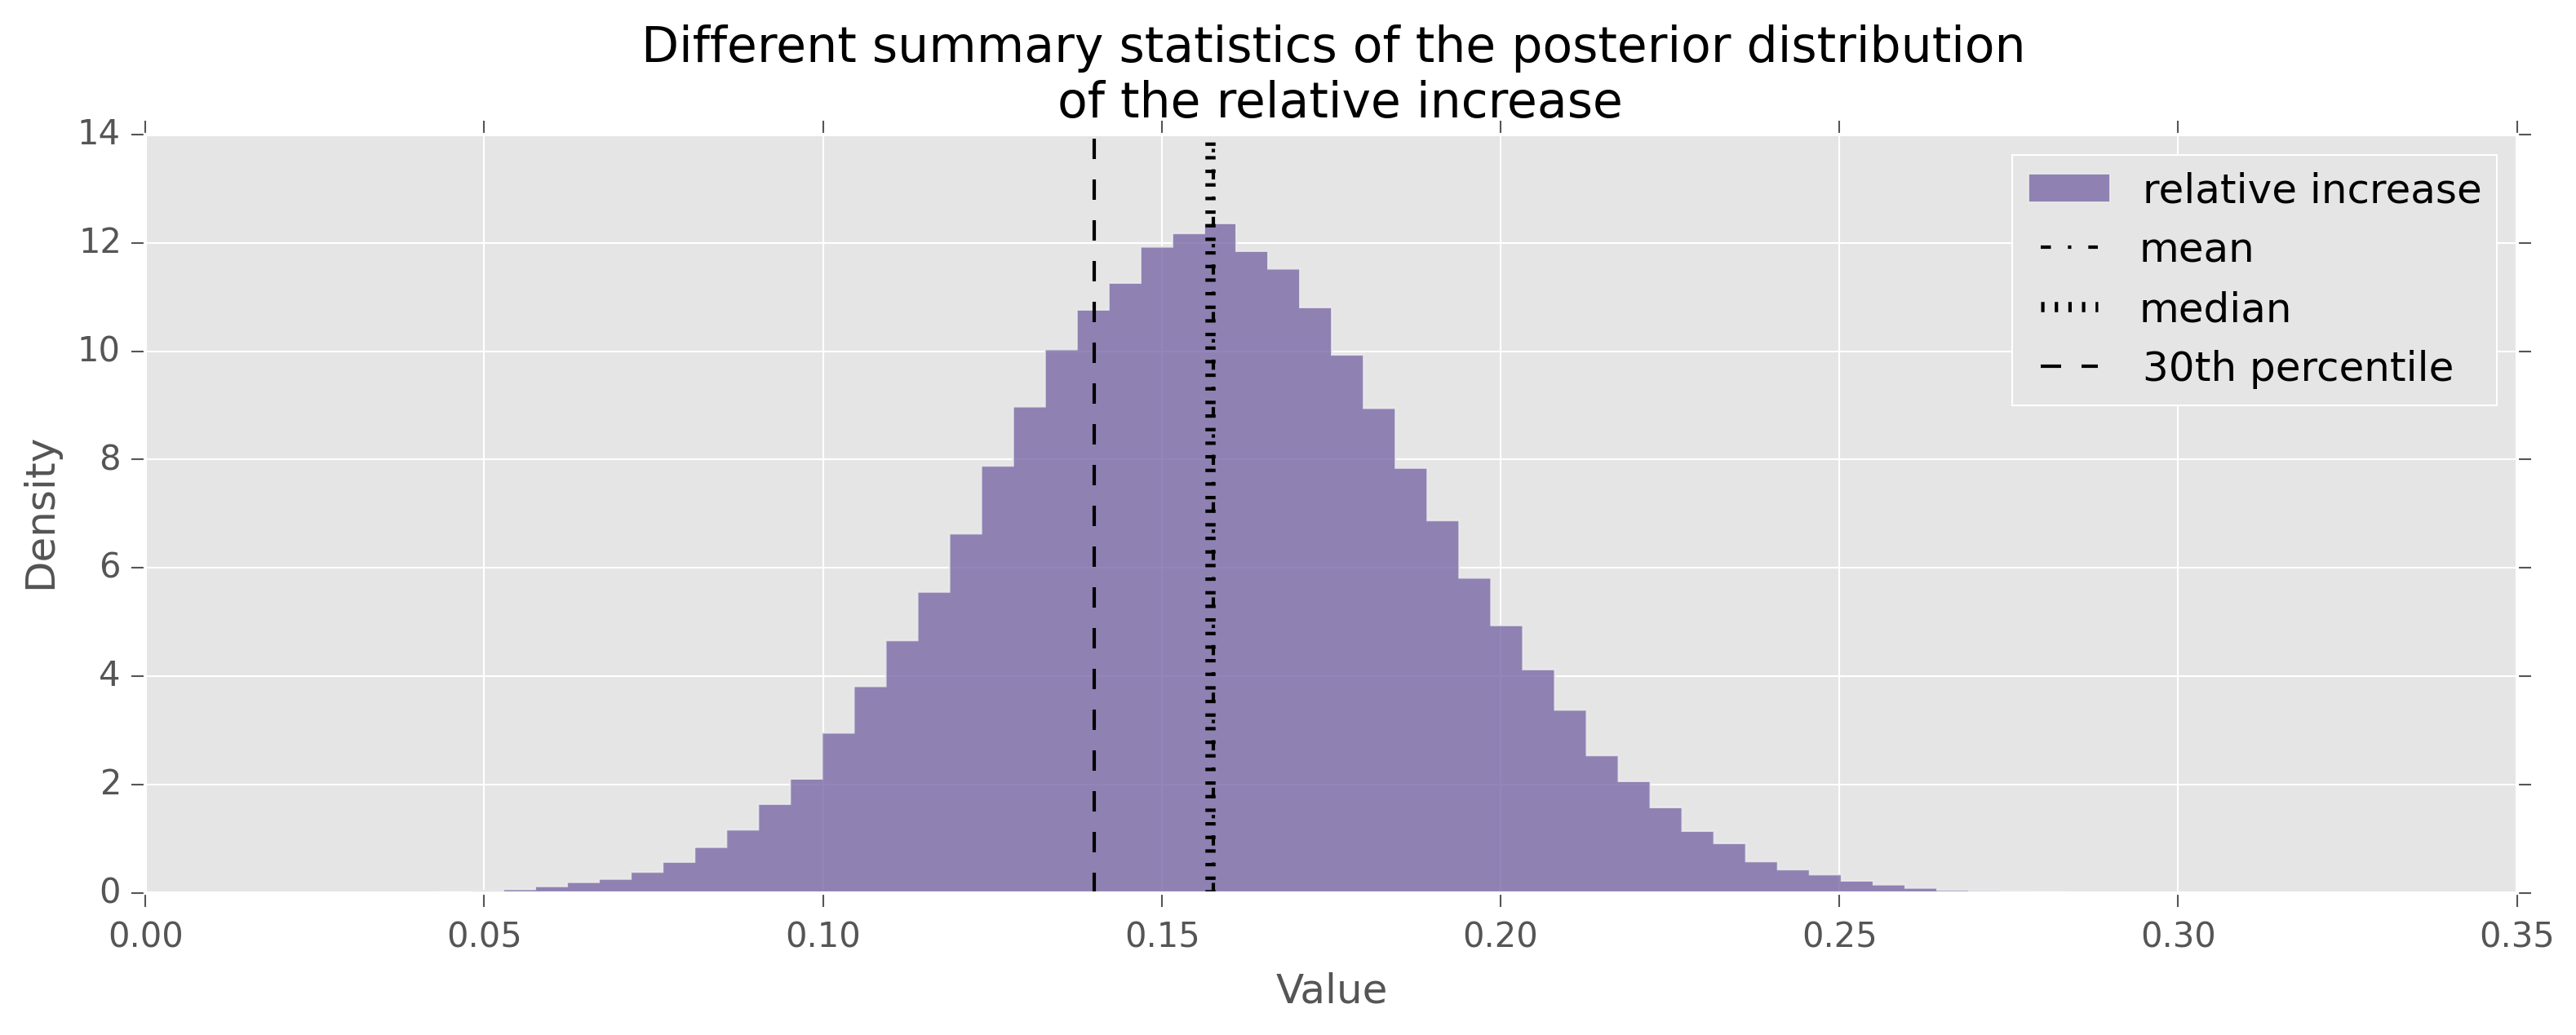

In [8]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)


plt.vlines(mean, 0, 14, linestyles='-.', label='mean')
plt.vlines(median, 0, 14, linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 14, linestyles='--',
           label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Different summary statistics of the posterior distribution \n of the relative increase")

plt.legend();


So the relative increase is about 16%; again the AL is definitely better than the NL at hitting home runs (becuase of the pitchers), but the relative amount of better is only  $\sim 15$%

### Do Bayesian A/B Testing on the Clinical Trial Data in the Literature.


Chung C.S. et al., “Comparative analysis of second malignancy risk in patients treated with Proton Therapy versus conventional Photon Therapy”, Red Journal S0360-3016(08)01001-8, International Journal of Radiation Oncology, Biology, 2008 September 1. Preliminary results here indicate that the use of PT is associated with a significantly lower risk of secondary malignancies compared to RT, even if additional analyses are required given the prolonged latency period for the development of radiation-induced cancers.

http://www.redjournal.org/article/S0360-3016%252808%252901001-8/fulltext

Matched retrospective cohort study of 1,450 patients treated with proton radiation therapy from 1974-2001 at the Harvard Cyclotron in Cambridge, MA, and patients treated with photon therapy in the Surveillance, Epidemiology, and End Results (SEER) cancer registry. We matched patients by age at radiation treatment, year of treatment, cancer histology, and site of treatment. We restricted the study to patients with ≥1 year of follow-up. The primary endpoint was the risk of a second malignancy in any site after radiation therapy.
We matched 503 Harvard Cyclotron proton patients with 1591 photon patients from the SEER registry. 6.4% of proton patients (32 patients) developed a second malignancy, while 12.8% of photon patients (203 patients) developed a second malignancy. The median duration of follow-up was 7.7 years in the proton cohort and 6.1 years in the photon cohort. The median age at treatment was 56 years in the proton cohort and 59 years in the photon cohort. After adjusting for gender and the age at treatment, treatment with photon therapy was significantly associated with an increased risk of a second malignancy (Adjusted Hazard Ratio 2.73, 95% CI 1.87 to 3.98, p < 0.0001).




In [9]:
PROTON_TOTAL = 503
GAMMA_TOTAL = 1591

PROTON_SECOND = 32
GAMMA_SECOND = 203

from scipy.stats import beta
alpha_prior = 1
beta_prior = 1

posterior_proton = beta(alpha_prior + PROTON_SECOND, beta_prior + PROTON_TOTAL - PROTON_SECOND)

posterior_gamma = beta(alpha_prior + GAMMA_SECOND, beta_prior + GAMMA_TOTAL - GAMMA_SECOND)


samples = 2000000

samples_posterior_proton = posterior_proton.rvs(samples)

samples_posterior_gamma = posterior_gamma.rvs(samples)

print (samples_posterior_gamma > samples_posterior_proton).mean()

0.999983


The above indicagtes that we are 99.999% certain that traditional $\gamma$-radiation therapy is **better** at causing secondary malignancies. These results agree with the orginal paper study results.


(0.02, 0.2)

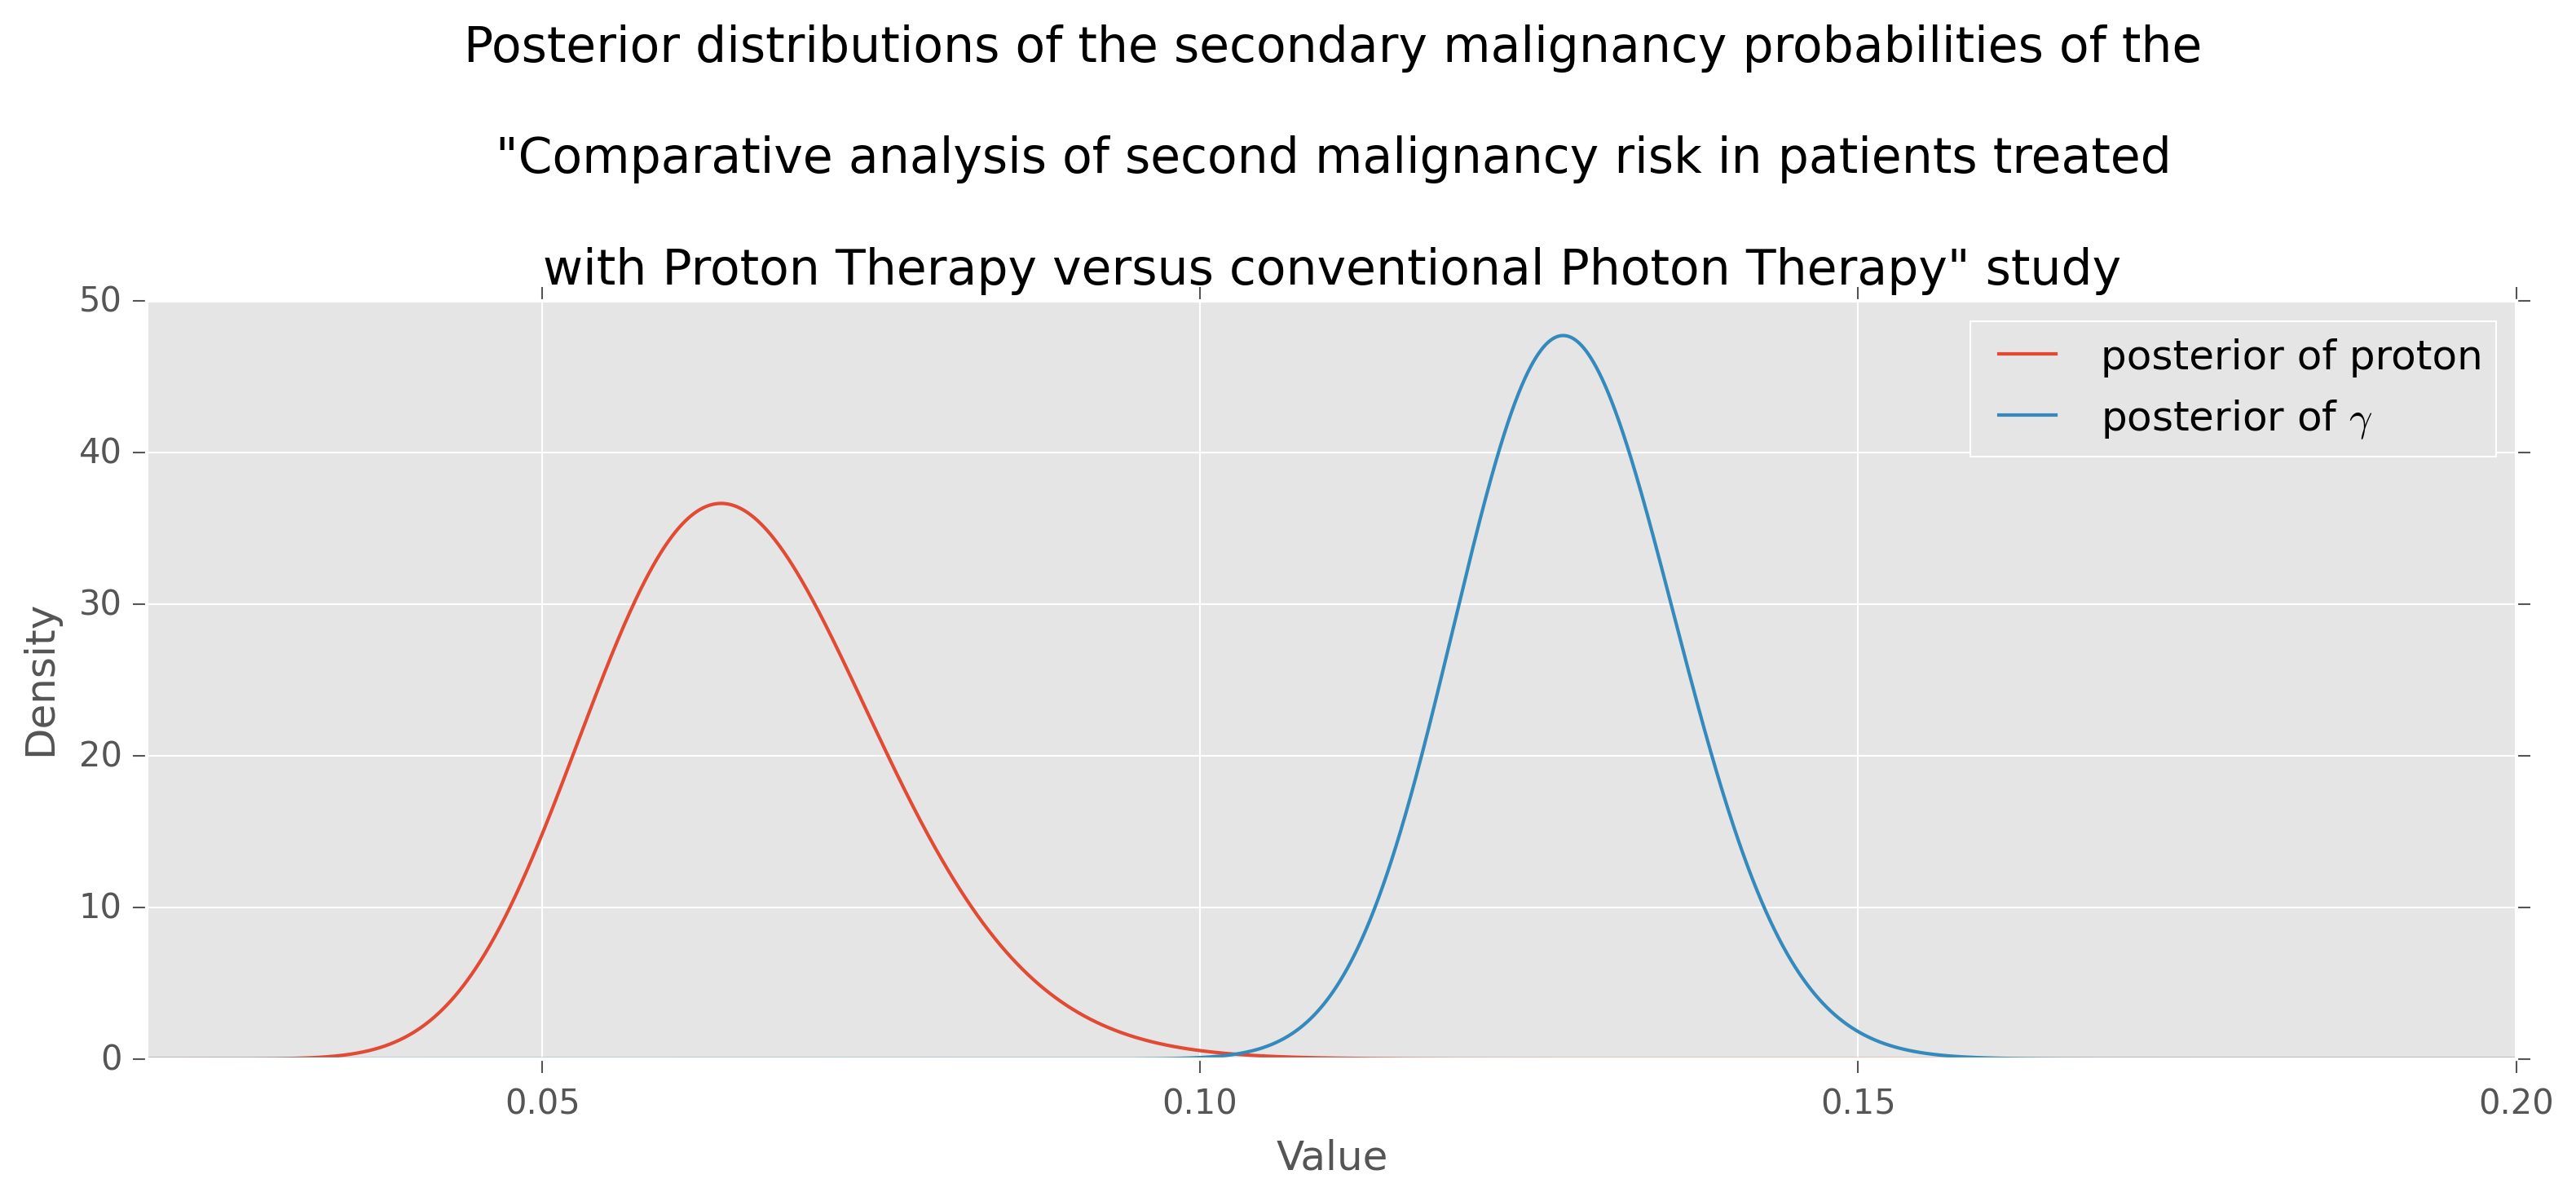

In [10]:

%matplotlib inline
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
x = np.linspace(0,1, 50000)
plt.plot(x, posterior_proton.pdf(x), label='posterior of proton')
plt.plot(x, posterior_gamma.pdf(x), label='posterior of $\gamma$')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distributions of the secondary malignancy probabilities of the \n
"Comparative analysis of second malignancy risk in patients treated \n
with Proton Therapy versus conventional Photon Therapy" study""")
plt.legend()
plt.xlim(0.02,0.2)

(array([  8.18143104e-05,   1.13955647e-03,   5.76206500e-03,
          2.42053481e-02,   7.32822466e-02,   1.73715157e-01,
          3.31213548e-01,   5.34779240e-01,   7.52159863e-01,
          9.47462309e-01,   1.08373573e+00,   1.14111678e+00,
          1.12204820e+00,   1.04863739e+00,   9.28311917e-01,
          7.87719868e-01,   6.52609379e-01,   5.24242726e-01,
          4.06897629e-01,   3.11969653e-01,   2.30804014e-01,
          1.73633342e-01,   1.24889545e-01,   9.05625977e-02,
          6.54748238e-02,   4.51556555e-02,   3.15101973e-02,
          2.28904753e-02,   1.56732843e-02,   1.13663453e-02,
          7.46847776e-03,   5.48740268e-03,   3.61736130e-03,
          2.59468242e-03,   1.78238319e-03,   1.10449319e-03,
          7.94767587e-04,   5.49324656e-04,   3.97383793e-04,
          2.74662328e-04,   1.75316379e-04,   1.46096983e-04,
          8.18143104e-05,   5.84387931e-05,   4.09071552e-05,
          2.92193966e-05,   1.75316379e-05,   2.92193966e-05,
        

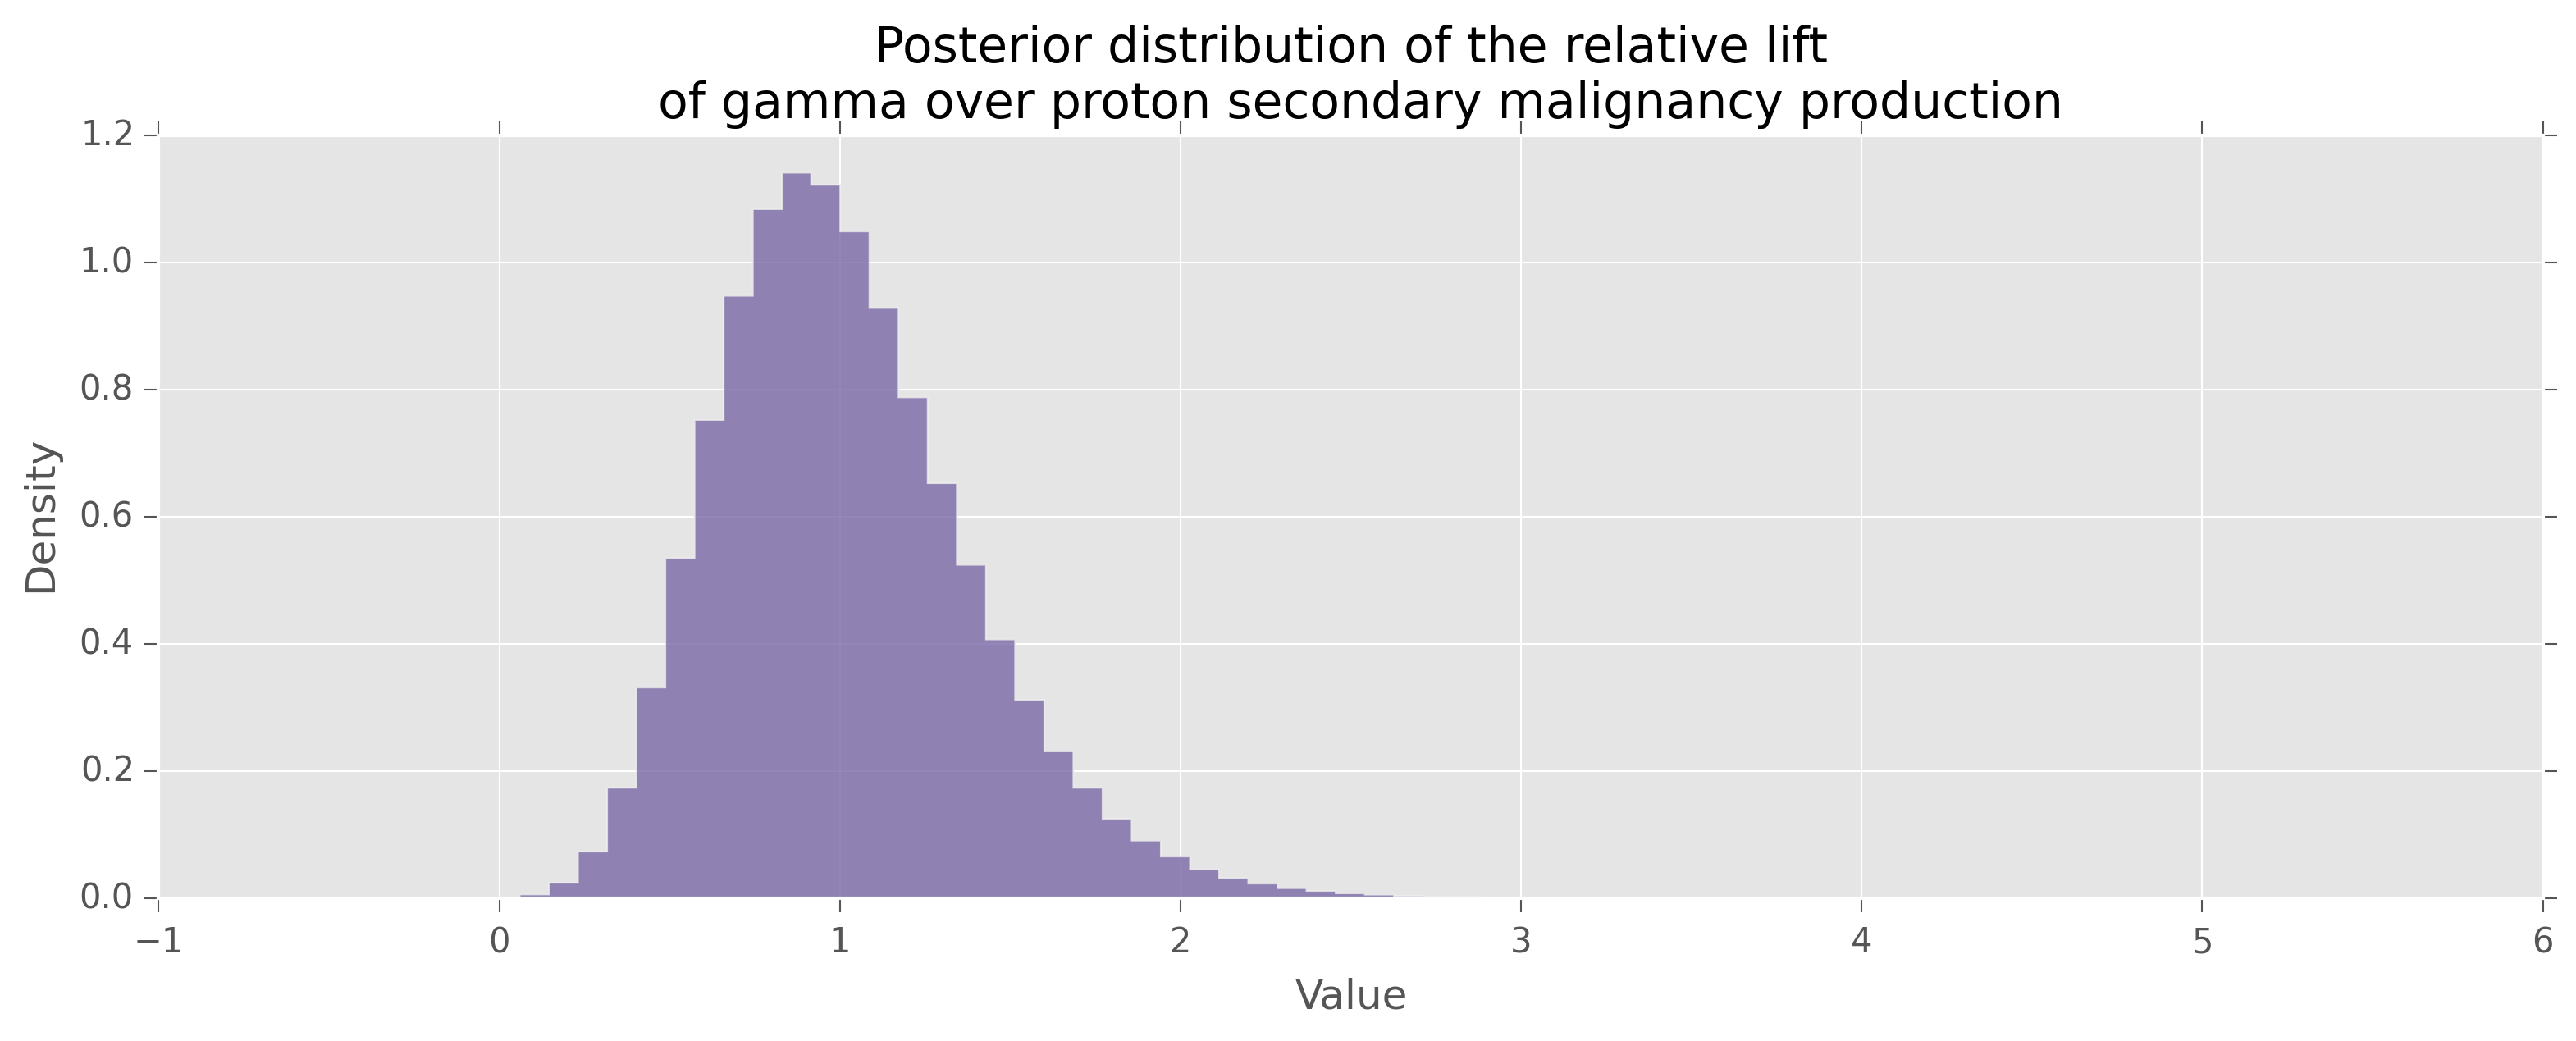

In [11]:
def relative_increase(a,b):
    return (a-b)/b

posterior_rel_increase = relative_increase(samples_posterior_gamma,
     samples_posterior_proton)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("""Posterior distribution of the relative lift \n of gamma over proton secondary malignancy production""")

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)

In [12]:
print (posterior_rel_increase > 0.2).mean()
print (posterior_rel_increase > 0.5).mean()
print (posterior_rel_increase > 1.).mean()

0.9984175
0.942405
0.471678


This means that there is a 47% chance that gamma therapy is a full 100% more likely than proton therapy to cause seeconday tumors.

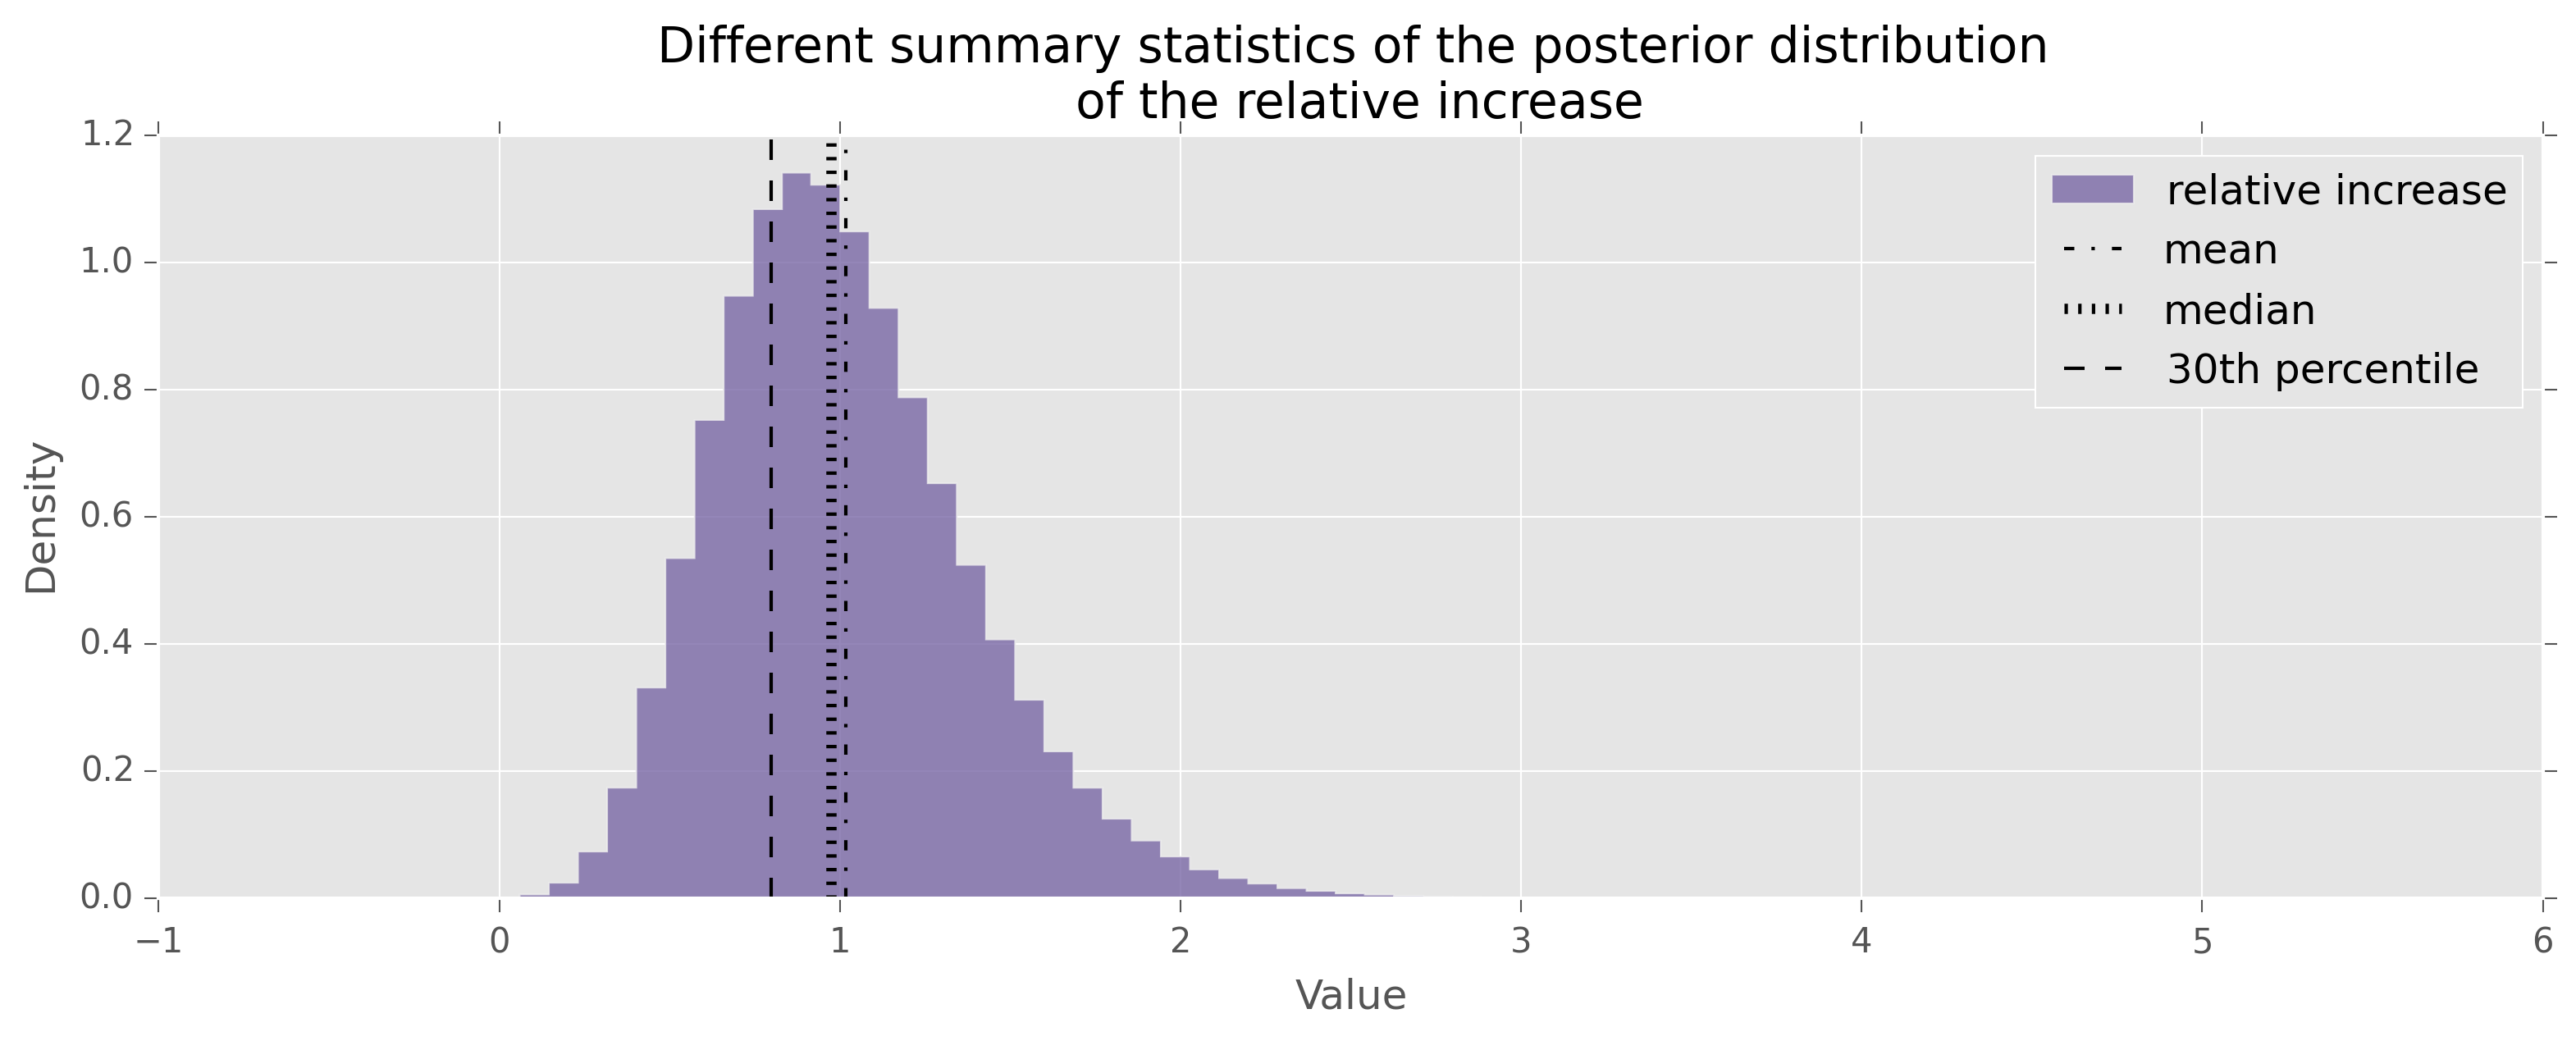

In [13]:
mean = posterior_rel_increase.mean()
median = np.percentile(posterior_rel_increase, 50)
conservative_percentile = np.percentile(posterior_rel_increase, 30)

plt.hist(posterior_rel_increase,histtype='stepfilled', bins=60, alpha=0.80,
         label = 'relative increase',color='#7A68A6', normed=True)


plt.vlines(mean, 0, 1.2, linestyles='-.', label='mean')
plt.vlines(median, 0, 1.2, linestyles=':', label='median', lw=3)
plt.vlines(conservative_percentile, 0, 1.2, linestyles='--',
           label='30th percentile')
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("Different summary statistics of the posterior distribution \n of the relative increase")

plt.legend();

### Health and Social Care Information Centre

http://www.hscic.gov.uk/searchcatalogue?productid=15361&q=cancer&infotype=0%2fOpen+data&sort=Relevance&size=10&page=1#top


## Searching PubMed for 

```
("Neoplasms"[Mesh]) AND "Proton Therapy"[Mesh] 
```

and restricting Article Types to Clinical Trial

gives 37 results


http://www.ncbi.nlm.nih.gov/pmc/articles/PMC4298831/

Between 2005 and 2012, 54 patients were enrolled on a prospective multi-institutional phase II trial using PT in pediatric RMS. As part of the protocol, intensity modulated radiation therapy (IMRT) plans were generated for comparison with clinical PT plans.


In [14]:
3./19

0.15789473684210525

In [15]:
2./79

0.02531645569620253

## Cochrane Library , Cochrane Central Register of Controlled Trials

search:
```
cancer AND proton therapy
```

yields 117 results

http://www.cancertodaymag.org/Spring2013/Pages/Proton-Therapy-Pros-Cons-Prostate-Cancer.aspx



Radiation Therapy Choices and Prostate Cancer Morbidity

Intensity-Modulated Radiation Therapy, Proton Therapy, or Conformal Radiation Therapy and Morbidity and Disease Control in Localized Prostate Cancer

Exactly the study we want to do!

```
Context There has been rapid adoption of newer radiation treatments such as intensity-modulated radiation therapy (IMRT) and proton therapy despite greater cost and limited demonstrated benefit compared with previous technologies.

Objective To determine the comparative morbidity and disease control of IMRT, proton therapy, and conformal radiation therapy for primary prostate cancer treatment.

Design, Setting, and Patients Population-based study using Surveillance, Epidemiology, and End Results–Medicare-linked data from 2000 through 2009 for patients with nonmetastatic prostate cancer.

Main Outcome Measures Rates of gastrointestinal and urinary morbidity, erectile dysfunction, hip fractures, and additional cancer therapy.
```
```
Prostate cancer is the most common malignancy in men, with more than 200 000 diagnoses and 30 000 deaths per year.1 Recent advances in technology have led to costlier treatments such as minimally invasive radical prostatectomy, intensity-modulated radiation therapy (IMRT), and proton therapy. The adoption of these technologies resulted in a \$350 million increase in health care expenditures in 2005 alone.2 The Institute of Medicine, Agency for Healthcare Research and Quality, Secretary of the Department of Health and Human Services, and others have called for comparative effectiveness research of localized prostate cancer treatments,3- 5 which is especially relevant for radiation therapy, for which IMRT has gradually replaced the older technique of conformal radiation therapy during the past 10 years. More recently, there has been a substantial increase in the number of proton facilities built, and direct-to-consumer advertising is likely to lead to an increase in its use.6- 8 The clinical benefit from these newer treatments is unproven, and comparative effectiveness research examining different radiation techniques is lacking. Given these trends in use, multiple recent reports have specifically called for research on proton therapy.9
```


```
The objective of this study was to examine the comparative morbidity and disease control outcomes after different radiation techniques in a recent cohort of prostate cancer patients with the Surveillance, Epidemiology, and End Results (SEER)–Medicare-linked database. Specifically, we compared IMRT, which has been rapidly adopted and is currently the most commonly used technique, with the older conformal radiation therapy. We further compared proton therapy, whose use is increasing,6 with IMRT.
```

```
Surveillance, Epidemiology, and End Results data are composed of 16 population-based cancer registries representing approximately 26% of the US population. SEER-Medicare links the registry data to Medicare administrative and health care claims data, which include 97% of US residents aged 65 years and older and has been documented extensively.10 University of North Carolina institutional review board approval was waived.
```


```
According to SEER-Medicare data, 251 787 patients received a diagnosis of prostate cancer between 2000 and 2007; had no additional cancers, metastatic disease, or disease diagnosis at autopsy; and had month and year of diagnosis in the database. To allow assessment of baseline comorbidity, the patient population was further restricted to men with at least 1 year of claims data before diagnosis.11 To ensure complete capture of health services, we excluded men who were enrolled in a health maintenance organization within 1 year of diagnosis or not enrolled in both Medicare Part A and Part B for the study duration, which resulted in a cohort of 108 756 patients. A sensitivity analysis excluded patients who had any health maintenance organization enrollment for the study duration and demonstrated similar results (eAppendix).

Using Current Procedural Terminology/Healthcare Common Procedure Coding System procedure codes, we identified 15 963 men who received radiation as primary treatment within 1 year of diagnosis (eAppendix). Patients who received radiation in combination with brachytherapy or prostatectomy were excluded. For the IMRT vs conformal radiation therapy comparison, we observed a large shift in use of these techniques during the study period (eFigure). To enable propensity score weighting in the 2 treatment groups, analysis was restricted to 12 976 men who received treatment between 2002 and 2006 to maximize the overlap in baseline characteristics: 6666 treated with IMRT and 6310 with conformal radiation therapy. Median follow-up for this comparison was 44 months for IMRT (range, 0.1-91.5 months) and 64 months for conformal radiation therapy (range, 0-91.7 months).

For the proton therapy vs IMRT comparison, we identified 684 men treated with proton therapy from 2002 to 2007. Because few institutions offered proton therapy, there was lack of overlap in baseline characteristics between proton therapy and IMRT patients largely because of 2 higher-level variables: SEER region and institutional affiliation with the Radiation Therapy Oncology Group. Therefore, we used propensity score matching to compare proton therapy with IMRT patients. Median follow-up for this comparison was 46 months for IMRT (range, 0.4-88.3 months) and 50 months for proton therapy (range, 0.3-90.2 months).
```



```
Morbidity outcomes included conditions associated with radiation therapy for prostate cancer: gastrointestinal morbidity, urinary incontinence, nonincontinence urinary morbidity, sexual dysfunction, and hip fractures.12- 16 Diagnoses and procedures in each morbidity category were counted as separate outcomes. Because the goal of this study was to examine long-term morbidity, we excluded person-time and diagnoses and procedures that occurred within 1 year of radiation therapy; acute radiation therapy–related morbidity commonly resolves and does not become long-term morbidity.12

Consistent with previous studies, we identified men requiring additional cancer therapy after radiation therapy as an indicator of disease recurrence.17- 19 Because radiation therapy is commonly used in combination with brachytherapy20 and sometimes as neoadjuvant treatment for planned prostatectomy,21 we defined additional cancer treatment as that occurring 9 months or more after initiation of radiation therapy. Furthermore, for patients who received radiation therapy concurrently with androgen deprivation therapy, additional treatment was defined as cessation of all treatment for 9 months or more, followed by reinitiation of androgen deprivation therapy or another salvage treatment.

Survival was not examined because death caused by prostate cancer is minimal within 5 years of diagnosis and not expected to be significantly different by radiation therapy technique within this period.1
```

```
The SEER registry provided patient-level demographic variables, including race, age at diagnosis, and marital status; census tract measures of income and education; SEER region; and population density (urban vs rural). Medicare claims data provided information on treatment dates, enrollment, and institutional affiliation with the Radiation Therapy Oncology Group, a radiation-specific clinical trials cooperative group. Radiation Therapy Oncology Group affiliation was used in propensity score weighting for the IMRT vs conformal radiation therapy comparison.

Baseline diagnoses of diabetes and conditions associated with the use of anticoagulation (atrial fibrillation and valvular disease) were determined by using claims within the year before radiation therapy (eAppendix); both have been shown to increase the morbidity risk from radiation therapy.22- 24 Use of androgen deprivation therapy in conjunction with radiation therapy was included as a covariate because of its potential effects on both disease control and erectile dysfunction.25
```



## Radiation Therapy Oncology Group, a radiation-specific clinical trials cooperative group. 

https://crcuserreg.acr.org/Registration/App_Web/RTOG/RTOGRegistration.aspx?Project=3

Can we get access?


I think so. 
But I need a "Human Research Subject Protection Certification" with Certification Date

Must be institution provided training or National Cancer Institute Training).Note:If you cannot obtain your Human Research Subjects Protection Certification through your institution, a free, web-based course can be found online at: NIH Training 

Take this training course: http://phrp.nihtraining.com/users/login.php

Protecting Human Research Participants
NIH Office of Extramural Research 

New to PHRP Course

If you are entering the course for the first time, you must complete a 
registration form to register a new account before proceeding.

Registartion is free.

To successfully complete this course and receive a certificate, you must view the content in all 7 modules and pass all 4 of the quizzes.

Once the course is successfully completed, a link will become available on the main menu for you to print your personalized certificate. This certificate will always be available by logging into the course.

https://phrp.nihtraining.com/users/pdf.php

Belmont Report

* Respect for persons
    1. Individuals should be treated as autonomous agents
    2. Persons with diminished autonomy are entitled to additional protections
* Beneficence
* Justice

The challenges in applying the **Belmont principle of respect for persons** are in:
* making sure that potential partipants comprehend the risks and potential benefits of participating in research
* avoiding influencing potential participants' decisions either through explicit or implied threats (coercion) or through excessive compensation (undue influence)

Two general rules have been articulated as complementary expressions of beneficent actions:

1. Do no harm
2. Maximize possible benefits and minimize possible harms

The challenge inherent in applying the **Belmont principle of beneficence** is how to determine when potential benefits outweigh considerations of risks and vice versa.


_justice_ requires that individuals and groups be treated fairly and equitably in terms of bearing the burdens and receiving the benefits of research. The principle of justive may arise in decisions about inclusion and excusion criteria for participation in research and requires investigators to question whether groups are considered for inclusion simply because of their availability, their compromised position, or their vulnerability - rather than for reasons directly related to the problem being studied. 

The challange of applying the **Belmont principle of justice** is how to decide which criteria should be used to ensure that harms and benefits of research are equitably distributed to individuals and populations.


## The HHS Regulations - Protection of Human Subjects

The ethical principles for research involving human subjects described in the Belmont Report are codified in teh Code of Federal Regulations, 45 CFR 46. The NIH follows all Subparts of the HHS regulations:

* Subpart A - Basic HHS Policy for Protections of Human Research Subjects
* Subpart B - Additional Protections for pregnant women, human fetuses and neonates involved in research
* Subpart C - Additional Protections Pertaining to Biomedical and Behavioral Research involving prisoners as subjects
* Subpart D - Additional protections for children involved as subjects in research
* Subpart E - Registration of Institutional Review Boards


### Subpart A - Basic HHS Policy for Protection of Human Research Subjects

Subpart A, Also called **"The Common Rule"**, describes the required protections for all human subjects

Subpart A defines a **_human subject_** as a living individual about whom an investigator .. conducting research obtains:

1. Data through intervention or interaction with the individual, or
2. identifiiable private information

Subpart A defines research as a systematic investigation .. designed to develop or contribute to generalizable knowledge.
This definition includes:
* Research development
* testing
* evaluation


#### Case Study: Human Heart Study

An investigator will be using human hearts in order to study factors leading to heart failure. One group of normal, control hearts will be obtained from cadavers. A set of diseased hearts will be obtained from individuals who are to receive a heart transplant.

The use of healthy hearts from cadavers does not constitute human subjects research, because the individuals from whom the hearts will be obtained are not living, but the use of the diseased hearts removed during transplant surgery is human subjects research, since the donors are alive.

### Additional Protections

The Belmont principle of respect for persons states, in part, that individuals with diminished autonomy may need additional protections. Subparts B, C, and D describe additional protections for some of the populations that are considered particularly vulnerable:

* Subpart B = Additional protections for pregnant women, human fetuses and neonates involved in research
* Subpart C - Additional protections pertaining to biomedical and behavioral research involving prisoners as subjects
* Subpart D - Additional protections for children involved as subjects in research

### Vulnerable Populations

Subparts B, C, and D define the specific categories of research in which pregnant women, human fetuses and neonates, prisoners, or children respectively may be involved. The subparts describe additional requirements for informed consent, and may specifiy additional responsibilities for the Institutional Review Board (IRB) when reviewing research incolving these populations, and list the requirements for research that need additional levels of review and approval. 

Often vulnerable populations include, but are not limited to, mentally disabled persons and economically and/or educationally disadvantaged persons. While the regulations do not specify what additional protections are necessary for these groups, the HHS regulations (45 CFR 46.111) do require that investigators include additional safeguards in the study to protect the rights and welfare of these individuals "When some or all of the subjects are likely to be vulnerable to **coercion** or **undue influence**".

#### Case Study: Fetal Imaging

Read the study description below and determine if subparts B, C or D of HHS REgulations require additional protections for the study's participants.

A study proposes to test a novel fetal imaging technology designed to enhance image quality and allow physicians to assess more accurately prenatal health. This technology has been tested both on pregnant mammals and non-pregnant women with no adverse effects. Pregnant women will be recruited at their regularly scheduled prenatal check-ups and those who consent to participate will receive the experimental scan.

Do Subparts B, C or D require that participants in this study receive additional protections?

YES

#### Case Study: Observational Study of Challenges Returning to Work

A study proposees to observe the challenges for former prisoners returning to office jobs. Researchers will recruit individuals who have spent over ten years in prison, have completed their sentences, and are now interviewing for office jobs.

Do Subparts B, C or D require that participants in this study receive additional protections?

NO They are **Former prisoners**!!


#### Case Study: Treatment and prevention research in adolescents

A study proposes to examine the effectiveness of a medical treatment and preventoin program for adolescents in a location where the legal age for consent to such treatment is 12. The adolescents involved range from ages 12 to 17.
Do Subparts B, C or D require that participants in this study receive additional protections?


YES

The correct answer is No.

The regulatory definition of children depends both on the local laws and on the specific treatments or procedures that will be involved in the research. Because the location in which the research will be conducted allows 12-year-olds to consent to the treatment, the participants in this research are not considered children under the HHS regulations and can provide informed consent to participate in the study. While the regulations do not require the additional protections of Subpart D for children in this study, the IRB may require some additional protections if they feel that the adolescents who will be involved in the study are vulnerable.

## Requirements for Federal Support of Human Subjects Research

The HHS regulations (45 CFR 46.120) require that Federal Departments and Agencies that conduct or support human subjects research must evaluate all applications for research using the following criteria:

* Risk to the subjects
* Adequacy of protection against these risks
* potential benefits of the research to the subjects and others
* importance of the knowledge gained or to be gained

### Equivalent protections for international research

When research covered by the HHS regulations takes place in countries other than the United States, the HHS regulations (45 CFR 46.101(h)) allow a department or agency head to approve the substitution of alternative policies, codes, or regulations to protect human subjects in lieu of the requirements of 45 CFR 46 as long as the alternatives afford protections that are at least equivalent to those provided in 45 CFR 46.

In a Federal Register Notice on July 7, 2006, HHS clarified that the requirements of the HHS regulations (45 CFR 46) must be satisfied for all HHS-conducted or -supported research covered by the Federalwide Assurance, regardless of whether the research is conducted domestically or internationally. As of the publication of that Notice, HHS had not deemed any other procedural standards equivalent to 45 CFR 46.

### Engagement in Human Subjects Research

Each institution that is engaged in NIH-funded human subjects research must:

* Obtain or hold a current Federalwide Assurance (FWA), assuring that an institution will comply with HHS regulatory requirements for the protection of human subjects (this is obtained from the HHS Office for Human Subjects Protections (OHRP)); and
* Certify to NIH that grant applications and contract proposals describing research involving human subjects has been reviewed and approved by an Institutional Review Board (IRB) designated in the FWA, and will be subject to continuing review by an IRB.

IRBs are committees that consist of 5 or more members with varying expertise and diversity that are responsible for reviewing and approving human subjects research activities on behalf of institutions.

The Common Rule specifies:

* IRB membership
* IRB functions & operations
* IRB review of research
* Criteria for IRB approval of research

and more.

The roles and responsibilities of IRBs are discussed extensively in the module on **Beneficence**.

### Exemptions

The HHS regulations describe categories of human subjects research that may be exempt from requirements described in the HHS regulations including IRB oversight.

Studies proposing only research that falls under one or more of the exempt categories of research do not require IRB review and approval, but the HHS Office for Human Research Protections (OHRP) has stated that: “Institutions should have a clear policy in place on who shall determine what research is exempt under 46.101(b)” and that investigators should not be able to determine whether or not their own research is exempt. This authority should rest with the IRB or other entity designated by the institution.

The exemptions can be found in 45 CFR 46.101(b) http://www.hhs.gov/ohrp/humansubjects/guidance/45cfr46.html#46.101




## Codes and Regulations : Summary

This module examined:

* The three basic ethical principles described in the Belmont Report
* The subsequent codication of these principles in 45 CFR 46 of the Code of the federal Regulations

The Belmont Reoprt summarizes the three basic ethical principles of clinical research as:

1. Respect for persons
    * individuals should be treated as **autonomous agents**
    * Persons with **diminished autonomy** are entited to additional protections
2. Beneficence
    * do no harm
    * maximize possible benefits and minimize possible harms
3. Justice
    * Requires that individuals and groups be treated fairly and equitably in terms of bearing the burdens and receiving the benefits of research
    

45 CFR 46 codifies these basic principles

* Subpart A describes the required protections for all Federally conducted or supported human subjects research
* Subpart B covers additional protections for pregnant women, human fetuses and neonates
* Subpart C outlines additional protections pertaining to biomedical and behavioral research involving prisoners as subjects
* Subpart D provides for additoinal protectoins for children

Additionally, the regulations discuss methods of determining whether research is expempt from the regulations.

## <font color='green'>Respect for Persons</font>




### What this module covers:

* the informed consent process
* requirements for documentation of informed consent
* waivers of informed consent
* diminished autonomy and legally authorized representatives
* participation of pregnant women in research
* assent from children and permission from parents
* obtaining informed consent from prisoners
* community consent

### the objectives for this module are:

* to outline the requirements for informed consent
* to state when waivers of informed consent and legally authorized representatives are appropriate

The principle of respect for persons can be broken down into two basic ideas:

1. Individuals should be treated as **autonomous agents**
2. Persons with **diminished autonomy** are entitled to additional protections


#### Informed Consent

The Belmont principle of respect for persons is primarily applied by requiring that all human subjects research partipants provide voluntary **informed consent** to participate in research. The three fundamental aspects of informed consent are:

* Voluntariness
* Comprehension
* Disclosure

The HSS regulations (45 CFR 46.116) require that **investigators** obtain legally effective **informed consent** from propsective participants in a way that allows them to consider whether or not to participate and that minimizes the possibility of **coercion** or **undue influence**.

Potential participants must understand that enrolling in the research is voluntary and that they may withdraw from the study at any time without penalty or loss of benefits.
In order for particpation in research to be voluntary, the potential for coercion and undue influence must be minimized.

#### Case Study: Sleeping Sickness Study on Campus

An **investigator**, who is a professor at a large university, is developing a grant applicatin for submission to the NIH to study sleeping sickness (trypanosomiasis.) This study will investigate surface antigen expression in trypanosomes, the parasite that causes sleeping sickness, in order to develop a vaccine. These parasites grow in human blood and lymph.

The study will require fresh human blood daily for several months, and thus will require research participants. A research assistant will maintain a schedule of research particpants to ensure that the study performs one collection per day and that blood collections are in accordance with American Red Cross Blood Donation Eligibility Guidelines; i.e. healthy, weigh at least 110 pounds, and have not donated a pint (570 ml.) of whole blood in the last 8 weeks. Participants will be compensated.

It is now time to make a decision about **recruitment** of the research participants.

Based on the number of students and employees in her classes and lab, the researcher feels confident that she will have enough particpants needed for the proposed research if she simply recruits among them. But she knows that some colleagues advtertise 
their studies through postings on campus. The **investigator** is faced with two possible options for recruiting normal, healthy 
research partcipants:

* recruit the students in her upper level classes and the technicians from her lab, and give \$5 **compensation** to partcipants per blood draw, or
* Recruit from the general university population (students, faculty and staff) by posting fliers around campus, and give \$5 compensation to particpants per blood draw

The investigator discusses the grant application and proposed research procedures with you. You think that the compensation plan is appropriate and that \$5 would not be an **undue influence** for either population to particpate.
From which population would advise the researcher to recruit?

CAMPUS POPULATION

**informed consent** should be understood as an **on-going process** rather than a level of legal protection for an institution. It is not intended to be a one-time act of having a partipant sign a form.

Informed consent is desgined to inform research subjects about the purpose, risks, potential benefits and alternatives to the research allows people to make a decision about whether or not to particpate based on their own goals and values. This exchange of information should occur at enrollment and throughout the study.

Investigators are responsible for providing information during the **informed consent** process in a manner that is understandable to the potential participants. **Investigators** should not enroll anyone in a study unless the investigator is confident that the individual coprehends all information disclosed and agrfees to procedures described during the informed consent process.

Investigators can use methods in addition to a **consent form** to enahce indiciduals' comprehension. Some examples include:

* oral presentations that provide potential participants with the opportunity to discuss the information and ask questions
* providing additional educational materials, such as brochures, about research in general and/or the specific procedures that will be used in the study
* video presentations that familliarize potential particpants with the procedures that will be used in the study

The informed consent process must be delivered in " ... language that is understandable to the subject ... " This may mean adjusting the reading levels of documents provided or translating documetns and presentations into the language with which partcipants are most comfortable. 



#### Case Study:  Sleping sickness study on campus

Now that your colleague studying sleeping sickness has decided on the method of recruitment for the study particpants, she must write an **informed consent** document for the particpants to sign.

The researcher has prepared two different draft consent documents and must select one to submit to her IRB for review.

Read the two consent documents and then choose the document that best informs the potential particpants about the study in which they will enroll:

CONSENT DOCUMENT 2



## Waivers of Informed Consent

The HHS regulations (45 CFR 46.116(c)) allow institutional review boards (IRBs) to waive or alter **some or all of the required elements of informed consent** if all of the following conditions are met:

1. "The research or demonstation project is to be conducted by or subject to the approval of state or local government officials and is designed to study, evaluate, or otherwise examine: (i) public benefit or service progrms; (ii) procedures for obtaining benefits or services under those programs; (iii) possible changes in or alternatives to those programs or procedures; (iv) possible changes in methods or levels of payments for benefits or services under those programs, and
2. The research could not practicably be carried out without the waiver or alternation."

## Waivers of Informed Consent

The HHS regulations (45 CFR 46.116(d)) also allow IRBs to waive or alter some or all of the required elements of informed consent if all of the following conditions are met:

1. "The research involves no more than **minimal risk** to the subjects
2. The waiver or alteration will not adversely affect the rights and welfare of the subjects
3. The research could not practicably be carried out without the waiver of alteration
4. Whenever appropriate, the subjects will be provided with additional pertinent information after participation."

### Practicability and waivers of informed consent

DEcisions about waivers ofinformed consent often concern the issue of **practicability**. Although practicability is not defined in the HHS regulations, it is not sufficient for an investigator to argue simply that seeking consent would be time-consuming or incur additional cost. In some situations, a waiver of informed consent may be appropriate for a medical record review or for using existing data or specimens that can be linked to identifiable individuals. Specific decisions regarding practicability are made by the IRB.

#### Case Study: New Analyses of Existing Data

An investigator has collected identifiable data from participants in a research study. He has completed the analyses that were originally proposed and described in the NIH grant application, the protocol approved by the IRB, and the informed consent document approved by the IRB. The informed consent document made no mention of using the data in additional research but gives permission for the investigator to re-contact the participants.

Now, based on new hypotheses, the investigator plans to conduct new analyses to fulfill purposes different from those described in the informed consent document, the NIH grant application and the IRB-approved protocol. He knows that he needs to obtain approval for the new research from his IRB and his NIH Program Official.

Does the investigator need to obtain new informed consent from the participants??

Ugh.....NO is my hope. "You _may_ be correct"

The investigator does not need to obtain new informed consent as long as the IRB has approved a waiver of informed consent.

### Requirements for Documentation of Informed Consent

The HHS regulations require that informed consent be documented using a written form that either contains all of the required elements (45 CFR 46.116(a)) or a short form that states that all of the required elements have been presented orally. This form must be signed by either the participant or the participant’s legally authorized representative (45 CFR 46.117).


The HSS regulations (45 CFR 46.117(c)) allow IRBs to waive the requirement for **dcoumented** informed consent if they find that either:

1. "The only record linking the particpant to the research would be the [informed] consent document and the principal risk to the particpants would be the potential harm resulting from a breach of confidentiality. Each subject will be asked whether the subject wants documentation linking the subject with the research, and the subject's wishes will govern, or
2. The research presents no more than **minimal risk** to the participants and involves no procedures for which written consent is normally required outside of the research context."

### Diminished Autonomy

An individual's **autonomy** can be affected by several factors including age, cognitive impairment, illness, and treatments. An individual's capacity to consent to a particular study should be assessed based on:

1. The individual's level of capacity, and
2. The complexity and risks of the study; i.e., the capacity needed for an indidivual to be able to understand teh study well enough to consent to participate.

### Decisional Capacity and Legally Authorized Representatives

The Belmont principle of respect for persons states that investigators need to make special provisions when including indiviudals in research who have diminished capacity for making decisions in their own best interests.

The HHS regulations, therefore, require that leagally authorized repreesntatives provide voluntary informed consent for individuals with diminished capacity to participate in research (45 CFR 46.116)

While the HHS regulations allow for legally authorized representatives to make substituted decisions for individuals who nee dassistance, **investigators** should obtain consent from teh participants to the extent possible. Becuase some individuals may be only temporarily or intermittently incapacitated (e.g., due to injury or medications), investigators should attempt to approach these individuals at a time when they do have the capacity to consent to research. If a participant regains the capacity to consent to research after the research has begun, investigators should obtain the participant's informed consent before continuing his or her particpation in the study.

### Participation of Pregnant Women in Research

Because research involving **pregnant women** may affect the woman, the **fetus**, or both the woman and the fetus, additional issues must be considered for studies of pregnant women.
The HHS regulations require:

* Preclinical studies be completed prior to the involvement of pregnant women.
* A consideration of risks and potential benefits for the fetus and pregnant woman

The HSS regulations prohibit:

* inducements of any kind to terminate a pregnancy
* **Investigators** from taking part in decisions about terminating a pregnancy
* Investigators from determining the viability of a **neonate**

Investigators, IRBs, and funding agencies must comply with requirements described in Subpart B of the HHS regulations

### Children's Participation in Research

**Children** may not have full capacity to make decisions in their own best interests; and therefore:

* Chjildren are considered a vulnerable population, and
* Children are unable to provide "legally effective informed consent" as required by the HHS regulations at 45 CFR 46.116

Because children cannot provide informed consent, children provide **assent** to participate in research, to the extent that they are able, and parents/guardians give **permission** for a child to participate in research.
The additional regulatory requirements of assent and permission for researach involving children (45 CFR 46.408) are intended to make sure that investigators respect the decisions of both children and their parents. Parental permission must be obtained for research involving children "in accordance with and to the extent that consent is required by 45 CFR 46.116

#### Assent and Permission for Children's Participation in Research

The ages, maturity and psychological states of the **children** involved in the research should be taken into account when determining whether children have the capacity to **assent**. This determination is made by the IRB. The IRB may require that **investigators** conduct an individual assessment of each child's ability to assent or may make a general determination for all children involved in the study. The content and language of the assent process should be appropriate to the age and education/developmental stage of the children providing assent. It may be necessary to have multiple assent documents or assent processes if the children to be enrolled in the research are of different ages or at different stages of development.

#### Case Study: Lack of Assent from a Child

A 7-year-old **child** has a rare genetic disorder. No treatment is currently available. You have designed a longitudinal study that will examine the progression of the disorder. The study will involve standard physical and psychological examinations, including drawing 10 ml of blood four times per year.

Aftger enrollment, at which time the parents provided **permission** for the child to participate in the study and the child provided assent, he panics and screams that he doesn't want to participate and wants to go home when he sees the nurse holding a needle for a blood draw. The parents are present and want the child to participate.

Do you need to withdraw this child from your study because he has withdrawn his **assent**?

I'm guessing YES

A number of issues should be considered to assist with decision-making. First, investigators need to identify the institutional resources available to help decide the appropriate action, e.g. the IRB, the Ethics Committee, a research participant’s advocate, the patient’s personal physician. Second, the investigators and others involved in the deliberations should consider issues such as:

* Is the child old enough to provide assent?
* Are their creative ways to gain the child's cooperation?
* Does the study provide direct benefit to the child enrolled?
* How severe is the child's fear?
* Is there a way to alleviate the fear?
* Can you wait until the child matures later on?

### Obtaining Informed Consent from Prisoners

Research involving **prisoners** requires approval by an IRB whose membership is specifically constituted to address the concerns of this vulnerable population per 45 CFR 46.304. If the research is conducted or supported by HHS, it must also be approved by the Secretary of HHS through the Office for Human Research Protections (OHRP). This approval signifies that "the proposed research falls within the categories of research permissible under 45 CFR 46.306(a)(2).

The HHS regulations (45 CFR 46, Subpart C) require additional protections for prisoners who are involved as participants in research because they may "be under constraints because of their incarceration which could affect their ability to make a truly voluntary and uncoerced decision whether or not to partipate as subjects in research.

The requirements specific to informed consent for prisoners are:

1. Any possible advantages accruing to the prisoner through his or her participation in the research, when compared to the general liviing conditions, medical care, quality of food, amenities and opportunity for earnings in the prison are not of such a magnitude that his or her ability to weight the risks of the research against the value of such advantages in the limited choice environment lf the prison is impaired. 
2. Adequate assurance exists that parole boards will not take into account a prisoner's participation in the research in making decisions regarding parole, and each prisoner is clearly informed in advance that participation in the research will have no effect on his or her parole.



### Community Consultation

In some cultures it is not appropriate to obtain **informed consent soley** from the individual participants, because the individual's interests may be considered to be intimately entwined with their community's interests. The appropriate way to attain community consent may vary widely but is often achieved through meetings with large groups of community representatives or community leaders.

It is also appropriate to consult a community before conducting research when the research involves risk to discrete, identifiacble populations. For example, members of a communitiy may feel stigmatized if a number of members of that community participate in reserach that may reveal unpopular or dangerous traits.

### Emergency Research

One example of a situation in which community consent is required is emergency research in life-threatening situations where obtaining **informed consent** is not feasible. In order for **investigators** to obtain a waiver of informed consent for emergency research, investigators must obtain consent from the communities in which the research will be conducted in addition to a number of other requirements. These requirements are described in Informed Consent Requirements in Emergency Research.  

Investigators should note that this **emergency waiver** of infomred consent does not apply to research that falls under Subpart B (pregnant women, human fetuses and neonates) or subpart C (prisoners) of the HHS regulations.

### Respect for Persons: Summary

During the **informed consent** process, the principle of respect for persons is applied by requiring that all human subjects provide voluntary informed consent to participate in the reserch.

Practical application of this principle means that potential study participants must

* Give their consent freely and voluntarily
* Have the decisional capacity to undertsand the information presented to them
* Be provided complete information about the study in order to make an informed decision

This module has examined:

* Information that should be included during the informed consent process
* The types of situations that can be considered for waiver of informed consent
* The appropriate involvement of **legally authorized representatives** for consent
* Obtaining consent from vulnerable populations; e.g., pregnant women, prisoners and children
* The need to undertake community consultation whne the individual's interests are intimately entwined with their community's interests